In [18]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import datasets, linear_model
from sklearn import  metrics

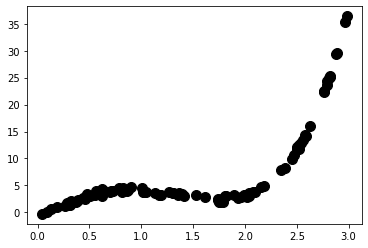

In [10]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Przykład
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [12]:
X_train = np.vstack(X_train)
X_test = np.vstack(X_test)

In [16]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([ 0.42292211,  0.76954563,  2.40275756, 17.09954199,  0.26231512,
       24.42321736,  3.48629055,  6.95162175, 21.98120353,  3.34771129,
        6.63632848, 16.00634325, 12.17320283, 21.2894756 ,  3.93771851,
        6.27517905, 15.3775288 ,  1.69284916,  2.07022002,  6.62712555,
        0.50561454,  0.29482532,  0.85251617, 22.47860189,  9.19499378,
        2.50236645,  3.31965779,  0.63588593,  0.45032363,  5.8012278 ,
        7.59910842,  0.75240603,  6.87189245,  3.8606742 ,  1.29013327,
       17.99066574, 12.87577642,  4.02120904,  3.44760972,  3.60361716])

In [19]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

Explained variance score: 0.8002114486892029
Median absolute error: 2.9084718833792422
Mean squared error: 10.614829318939954
Mean absolute errors: 2.8741881994025102


# Zadanie
Wylicz powyższe miary dla wszytkich modeli:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [20]:
for i in range(1, 6):
    model2 = make_pipeline(PolynomialFeatures(i), linear_model.LinearRegression())
    model2.fit(X_train, y_train)

    print(f"\ndegree_{i}")
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))
    
model2 = make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression())
model2.fit(X_train, y_train)

print("\ndegree_25")
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))


degree_1
Explained variance score: 0.4827363716727848
Median absolute error: 3.3025670849541773
Mean squared error: 27.149816439005047
Mean absolute errors: 4.508312459257298

degree_2
Explained variance score: 0.8002114486892029
Median absolute error: 2.9084718833792422
Mean squared error: 10.614829318939954
Mean absolute errors: 2.8741881994025102

degree_3
Explained variance score: 0.9859174901957314
Median absolute error: 0.5031137142302138
Mean squared error: 0.7305053406837471
Mean absolute errors: 0.6193501327211581

degree_4
Explained variance score: 0.9980517253312337
Median absolute error: 0.1546590803322565
Mean squared error: 0.10249995713005995
Mean absolute errors: 0.24605244166944754

degree_5
Explained variance score: 0.9980508858566064
Median absolute error: 0.17603470688675937
Mean squared error: 0.10290837458090976
Mean absolute errors: 0.24996423387325278

degree_25
Explained variance score: 0.9971340895165342
Median absolute error: 0.26288508979558567
Mean squared